# Import neseccary library

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the data

In [263]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display information about the data

In [264]:
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# Check for missing values

In [265]:
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Visualization

<ipython-input-266-df692852e687>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette='Set2')


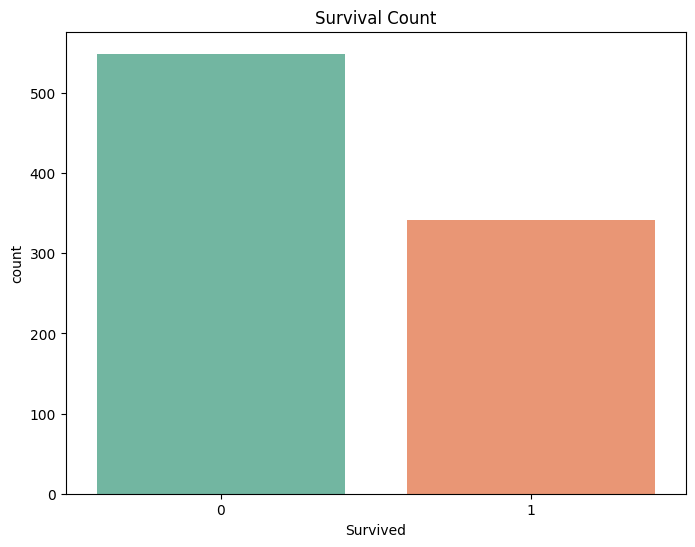

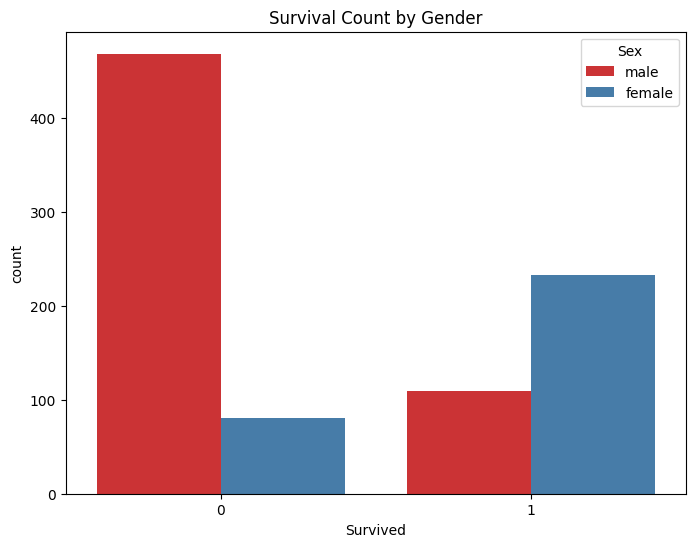

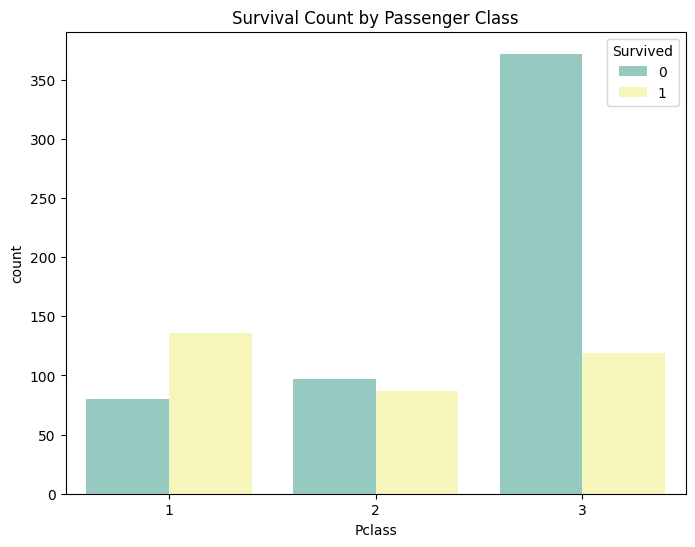

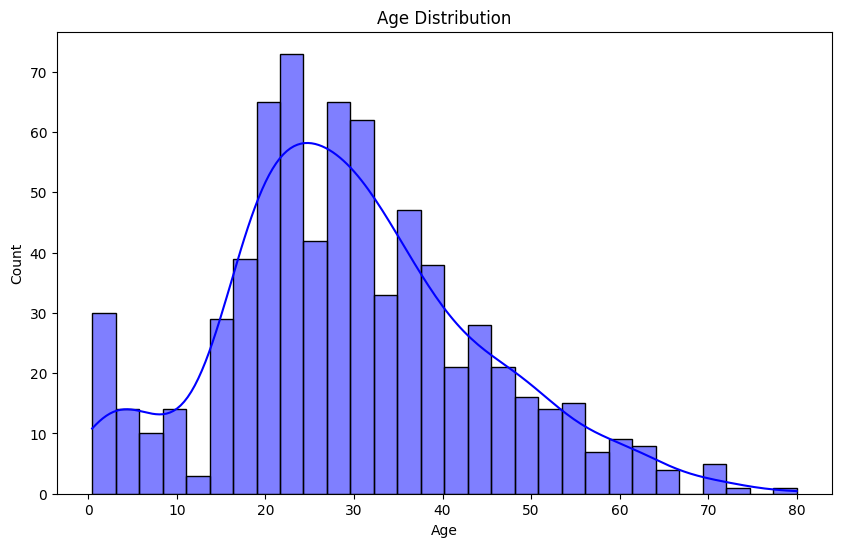

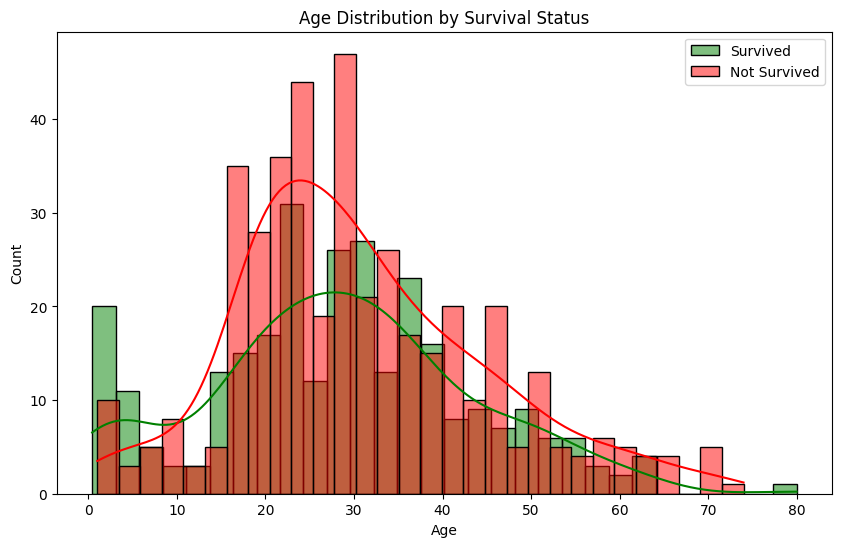

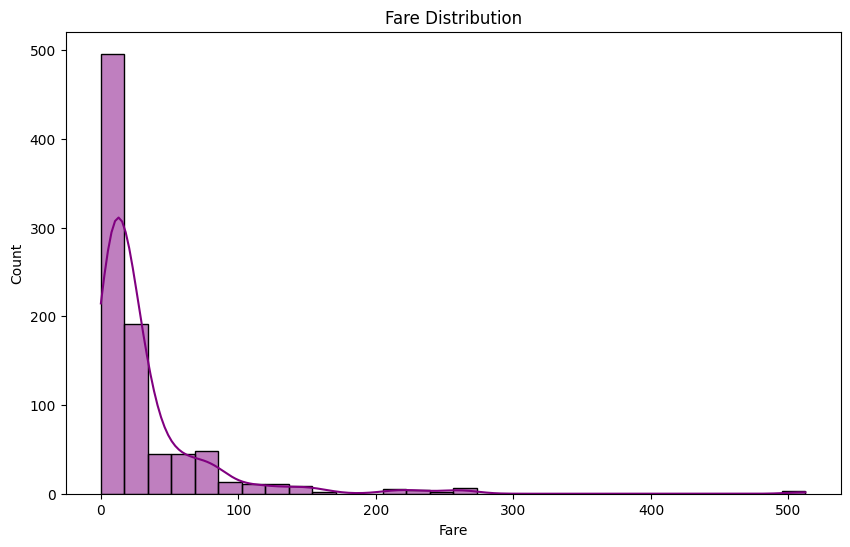

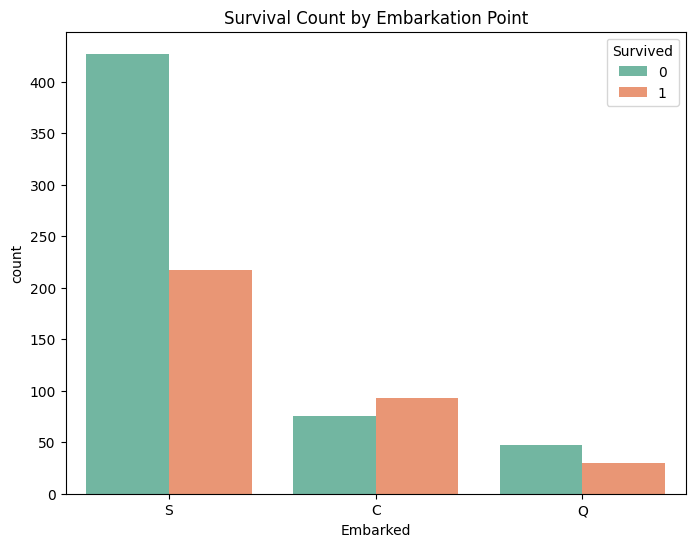

In [266]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data, palette='Set2')
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='Set1')
plt.title('Survival Count by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set3')
plt.title('Survival Count by Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'].dropna(), kde=True, bins=30, color='green', label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'].dropna(), kde=True, bins=30, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution by Survival Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], kde=True, bins=30, color='purple')
plt.title('Fare Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=train_data, palette='Set2')
plt.title('Survival Count by Embarkation Point')
plt.show()

# Encode categorical variables

In [267]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

# Handle missing values


In [268]:
age_imputer = SimpleImputer(strategy='median')
train_data['Age'] = age_imputer.fit_transform(train_data[['Age']])
test_data['Age'] = age_imputer.transform(test_data[['Age']])

train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

embarked_imputer = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = embarked_imputer.fit_transform(train_data[['Embarked']])
test_data['Embarked'] = embarked_imputer.transform(test_data[['Embarked']])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

# Drop unnecessary columns

In [269]:
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

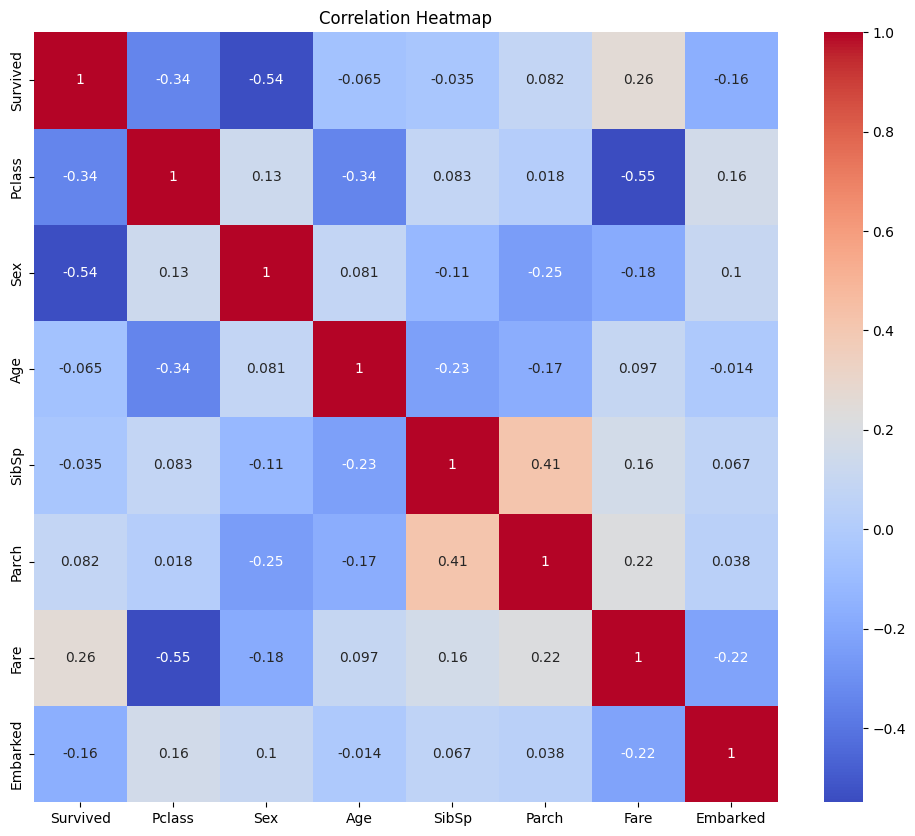

In [270]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# preparing data for model by split it

In [271]:
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
test_data = imputer.transform(test_data)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data

In [272]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data = scaler.transform(test_data)

# Define the models and their hyperparameters

In [279]:

models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=41),
    'SVC': SVC(random_state=41)
}

params = {
    'RandomForestClassifier': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Perform GridSearchCV for each model

Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for RandomForestClassifier: 83.79888268156425 %
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



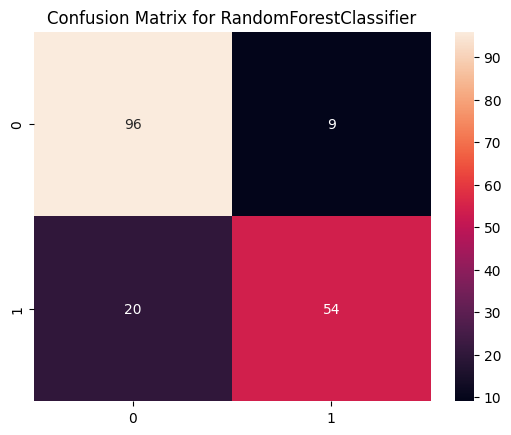

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Accuracy for GradientBoostingClassifier: 83.24022346368714 %
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.70      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



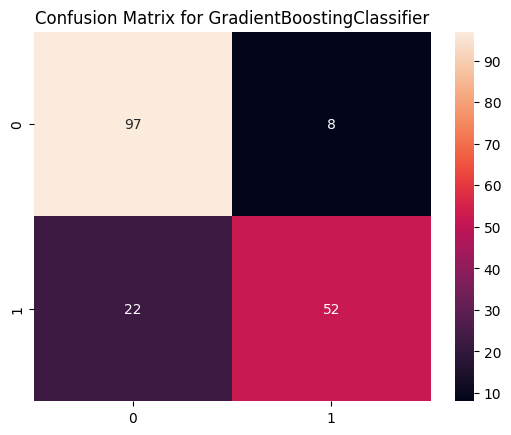

Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Accuracy for SVC: 81.56424581005587 %
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



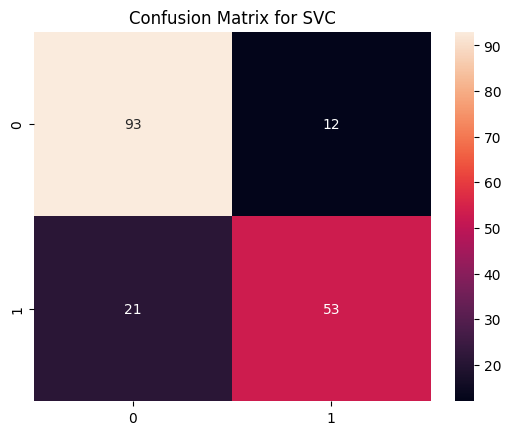

In [281]:
best_estimators = {}
for model_name in models.keys():
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    y_pred = best_estimators[model_name].predict(X_val)
    print(f'Accuracy for {model_name}: {accuracy_score(y_val, y_pred)*100} %')
    print(classification_report(y_val, y_pred))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Choose the best model based on accuracy

In [275]:
best_model_name = max(best_estimators.keys(), key=lambda name: accuracy_score(y_val, best_estimators[name].predict(X_val)))
best_model = best_estimators[best_model_name]
print(f'Best model: {best_model_name}')

Best model: RandomForestClassifier


# Save the best model

In [276]:
joblib.dump(best_model, 'titanic_best_model.pkl')

predictions = best_model.predict(test_data)

original_test_data = pd.read_csv('test.csv')

submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)